In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../sdpm_py_util')
import ocn_functions as ocnfuns


/home/mspydell/models/PFM_root/PFM/driver/../sdpm_py_util/ocn_functions.py:28: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater


In [5]:

bc1 = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/LV1_OCEAN_BC.nc')
ic1 = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/LV1_OCEAN_IC.nc')
#f = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/LV1_ATM_FORCING.nc')

ic2 = netCDF4.Dataset('/scratch/matt/sdtjre_L1/ocean_rst_LV1_20172018_01.nc')
bc2 = netCDF4.Dataset('/scratch/matt/sdtjre_L1/BC_LV1_20181201_20200930_smooth.nc')

grd = netCDF4.Dataset('/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV1_rx020_hmask.nc')

his = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/His/LV1_ocean_his.nc')
#hyc = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/hy_cat_2024-08-10T12:00.nc')
#print(bc1.variables.keys())
#print(bc2.variables.keys())
#print(hyc.variables.keys())
#print(hyc.variables['depth'][:])


In [7]:
OCN_R = ocnfuns.load_ocnR_from_pckl_files()
print(OCN_R.keys())


swell
dict_keys(['depth', 'lat_rho', 'lon_rho', 'lat_u', 'lon_u', 'lat_v', 'lon_v', 'ocean_time', 'ocean_time_ref', 'salt', 'temp', 'ubar', 'urm', 'vbar', 'vrm', 'zeta', 'vinfo'])


(21, 40, 390, 253)


(-10.0, 3.0)

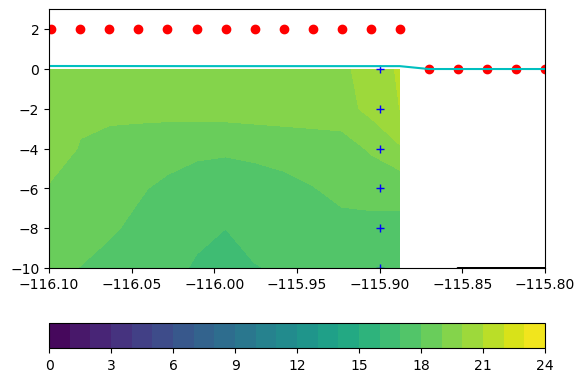

In [9]:
varnm='h'
hb = grd.variables[varnm][:]
msk = grd.variables['mask_rho'][:]
zeta = his.variables['zeta'][0,:,:]

varnm='temp'
vv=OCN_R[varnm]
print(np.shape(vv))
fig, ax = plt.subplots()
plevs=np.arange(0,25,1)
p0=ax.contourf(OCN_R['lon_rho'][0,:],-OCN_R['depth'][:],np.squeeze(vv[0,:,0,:]),plevs)
p1=ax.plot(OCN_R['lon_rho'][0,:],-hb[0,:],'k')
p2=ax.plot(OCN_R['lon_rho'][0,:],2*msk[0,:],'ro')
p3=ax.plot(-115.9*np.ones((40,1)),-OCN_R['depth'][:],'b+')
p4=ax.plot(OCN_R['lon_rho'][0,:],np.squeeze(zeta[0,:]),'c')
fig.colorbar(p0, ax=ax,location='bottom')
ax.set_xlim([-116.1, -115.8])
ax.set_ylim([-10,3])


In [33]:
iy = 106
ix = 41
Zrm = ocnfuns.load_rom_depths('/scratch/PFM_Simulations/LV1_Forecast/Forc/roms_tmp_depth_file.pkl')
yy = np.squeeze(Zrm['zr_ic'][:,iy,ix])
zh = np.squeeze(-OCN_R['depth'][:])
fofz = OCN_R['temp'][0,:,iy,ix]
tofz = ocnfuns.interp_to_roms_z(zh,fofz,yy,-hb[iy,ix])
varnm='temp'
told=ic1.variables[varnm][0,:,iy,ix]
print('the interpolated to roms z is')
print(tofz)
print('the temperature in the IC file is')
print(told)
print('the temp in the OCN_R file is')
print(fofz)
print('the bottom depth is')
print(-hb[iy,ix])
print('hycom depths are')
print(zh)
print('roms depths are')
print(yy)


the interpolated to roms z is
[        nan         nan         nan         nan  1.43685597  1.5188718
  1.60093009  1.71835582  1.91919477  2.18497257  2.61582071  3.04624018
  3.52153977  3.96115848  4.48542196  5.00355438  5.55963706  6.11202323
  6.63623544  7.27039547  7.88233541  8.46226005  9.12388017  9.86788074
 11.11835349 12.41758584 13.59750219 14.5583965  15.52590487 16.52226633
 17.59056885 19.04802761 20.08281897 20.14670654 20.19667345 20.21528451
 20.22373036 20.22892162 20.23115635 20.22748195]
the temperature in the IC file is
[10.71289621 10.71289621 10.71289621 10.71289621  1.140572    1.26112148
  1.37999655  1.53051892  1.75948572  2.04900053  2.49836256  2.94500404
  3.43402196  3.88590203  4.42023282  4.94721962  5.51085097  6.06987066
  6.59997014  7.23896096  7.85519723  8.4389387   9.10377717  9.85051233
 11.10292403 12.40393461 13.58558599 14.54817024 15.51717929 16.5148657
 17.58432996 19.04275032 20.07849632 20.14335371 20.19414014 20.21344334
 20.22246891

(21, 40, 253)


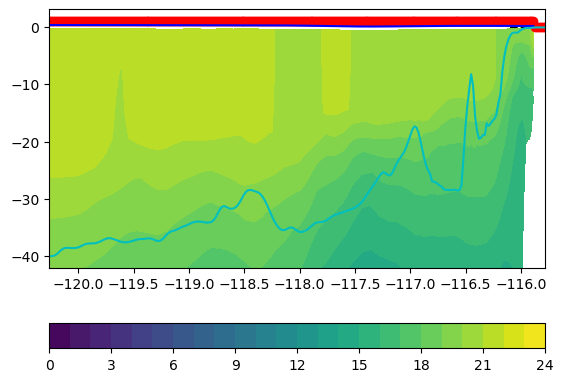

In [13]:


varnm='temp_south'
vv=bc1.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots()
xx = np.tile( OCN_R['lon_rho'][0,:],[40,1] )
#print(xx)
#print(np.shape(xx))
yy = np.squeeze(Zrm['zr_bc_s'][0,:,:])
#print(yy)
#print(np.shape(yy))
zz = np.squeeze(np.squeeze(vv[0,:,:]))
#print(np.shape(zz))
#p0=ax.imshow(zz)
p0=ax.contourf(xx,yy,zz,plevs)
p1=ax.plot([-116.1,-115.85],[0,0],'--k')
p2=ax.plot(OCN_R['lon_rho'][0,:],1*msk[0,:],'ro')
p3=ax.plot(OCN_R['lon_rho'][0,:],OCN_R['zeta'][0,0,:],'b')
p3=ax.plot(OCN_R['lon_rho'][0,:],-0.01*hb[0,:],'c')


fig.colorbar(p0, ax=ax,location='bottom')
#ax.set_xlim([-116.1, -115.8])
#ax.set_ylim([-1,1])


(21, 40, 253)


(0.0, 250.0)

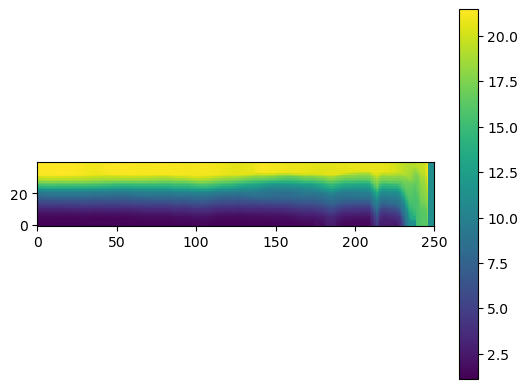

In [15]:
varnm='temp_south'
vv=bc1.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots()
p0=ax.imshow(vv[0,:,:], interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax,location='right')
ax.set_xlim([0, 250])


(21, 40, 253)


(30.0, 40.0)

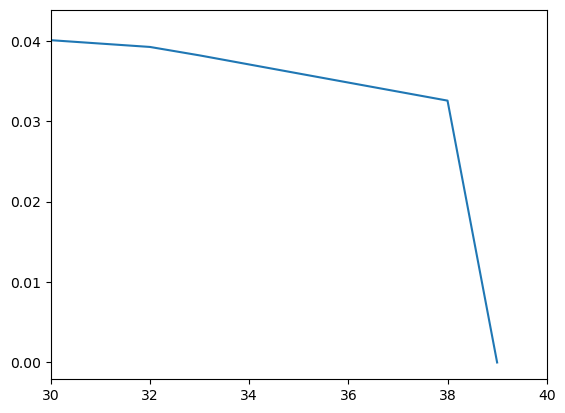

In [78]:
varnm='v_south'
vv=bc1.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots()
p0=ax.plot(vv[0,:,245])
ax.set_xlim([30, 40])


In [ ]:


varnm='temp'
vv=his.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots()
p0=ax.imshow(vv[0,39,:,:], interpolation='none',origin='lower')
p1=ax.plot(41,106,'rx')
fig.colorbar(p0, ax=ax,location='bottom')
ax.set_xlim([200, 250])
ylm = [0,50] 
ax.set_ylim(ylm)


(1, 40, 390, 253)


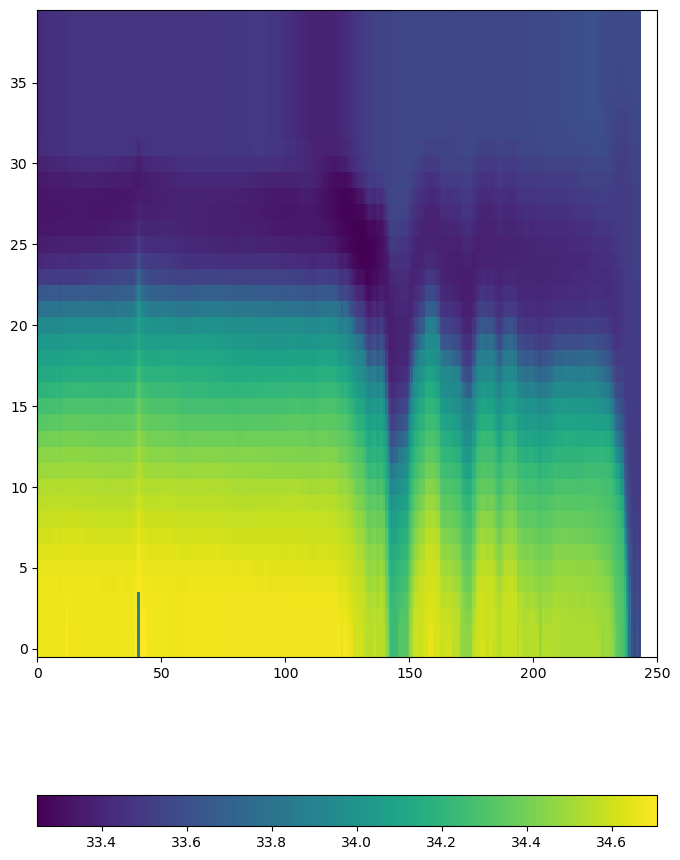

In [28]:
iy=106
varnm='salt'
vv=his.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots(figsize=(8, 12))
vv2 = np.squeeze(vv[0,:,iy,:])
p0=ax.imshow(vv2, interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax,location='bottom')
ax.set_xlim([0, 250])
ax.set_aspect('auto', adjustable='box')

(1, 390, 253)


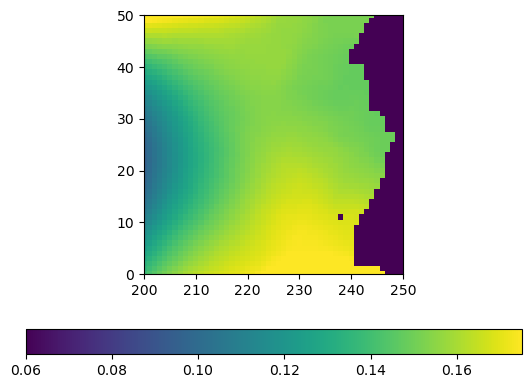

In [50]:
varnm='zeta'
vv=his.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots()
p0=ax.imshow(vv[0,:,:], interpolation='none',origin='lower')
p1=ax.plot(41,106,'rx')
fig.colorbar(p0, ax=ax,location='bottom')
ax.set_xlim([200, 250])
ylm = [0,50] 
ax.set_ylim(ylm)
p0.set_clim(.06,.175)

(390, 253)


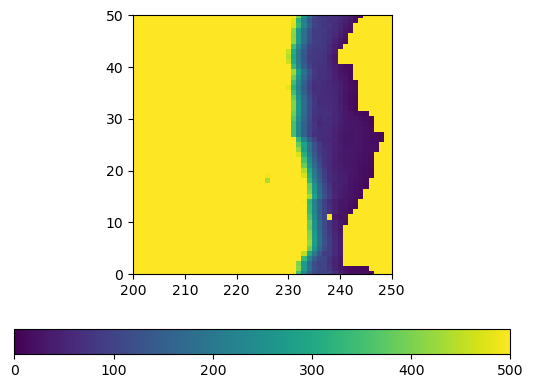

In [68]:

varnm='mask_rho'
vmsk = grd.variables[varnm][:]
varnm='h'
vv = grd.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots()
vv[vmsk==0]=1000
p0=ax.imshow(vv[:,:], interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax,location='bottom')
ax.set_xlim([200, 250])
ylm = [0,50] 
ax.set_ylim(ylm)
p0.set_clim(0,500)

(21, 253)


(-0.1, 1.0)

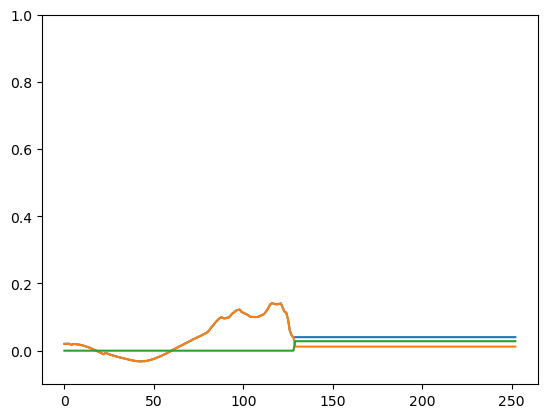

In [4]:
vv = bc1.variables['vbar_north'][:]
v2 = ic1.variables['vbar'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,-1,:])
p3=ax.plot(vv[0,:]-v2[0,-1,:])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 253)


(-0.1, 1.0)

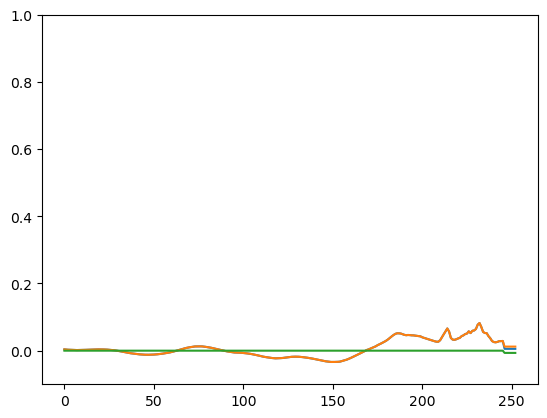

In [5]:
vv = bc1.variables['vbar_south'][:]
v2 = ic1.variables['vbar'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,0,:])
p3=ax.plot(vv[0,:]-v2[0,0,:])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 389)


(-0.1, 1.0)

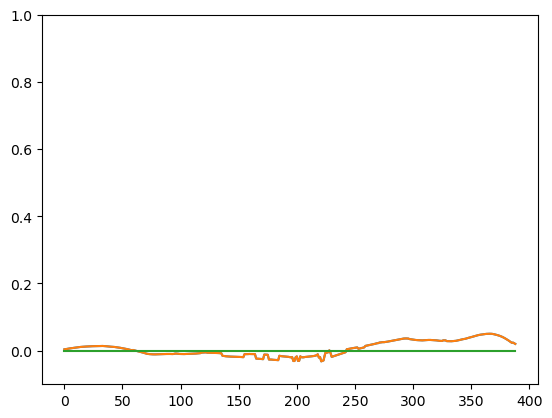

In [6]:
vv = bc1.variables['vbar_west'][:]
v2 = ic1.variables['vbar'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,:,0])
p3=ax.plot(vv[0,:]-v2[0,:,0])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 253)


(-0.1, 1.0)

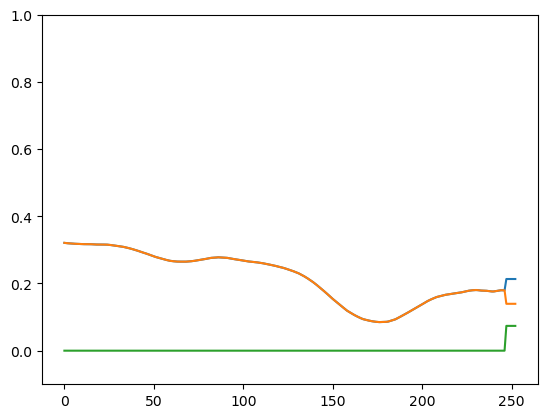

In [7]:
vv = bc1.variables['zeta_south'][:]
v2 = ic1.variables['zeta'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,0,:])
p3=ax.plot(vv[0,:]-v2[0,0,:])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 253)


(-0.1, 1.0)

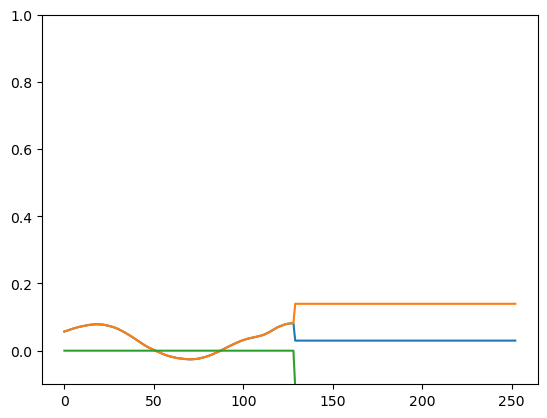

In [8]:
vv = bc1.variables['zeta_north'][:]
v2 = ic1.variables['zeta'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,-1,:])
p3=ax.plot(vv[0,:]-v2[0,-1,:])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 390)


(-0.1, 1.0)

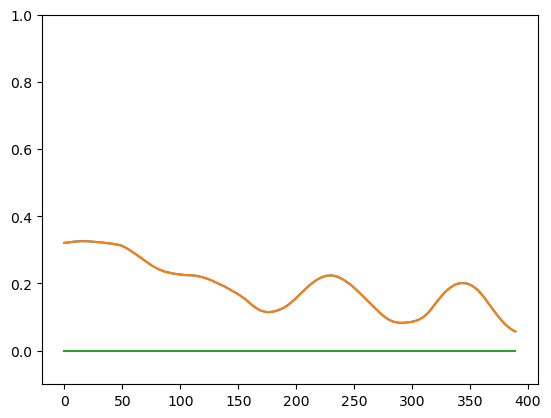

In [9]:
vv = bc1.variables['zeta_west'][:]
v2 = ic1.variables['zeta'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,:,0])
p3=ax.plot(vv[0,:]-v2[0,:,0])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 252)


(-0.1, 1.0)

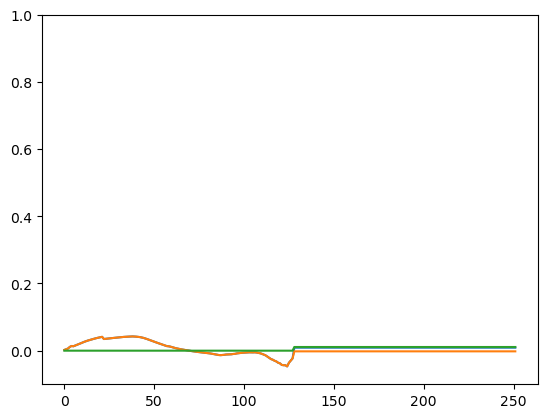

In [10]:
vv = bc1.variables['ubar_north'][:]
v2 = ic1.variables['ubar'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,-1,:])
p3=ax.plot(vv[0,:]-v2[0,-1,:])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 252)


(-0.1, 1.0)

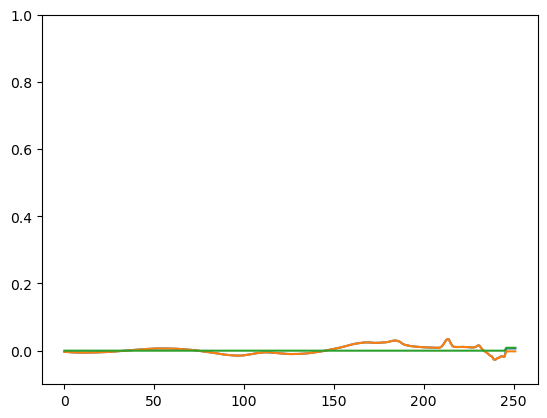

In [11]:
vv = bc1.variables['ubar_south'][:]
v2 = ic1.variables['ubar'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,0,:])
p3=ax.plot(vv[0,:]-v2[0,0,:])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 390)


(-0.1, 1.0)

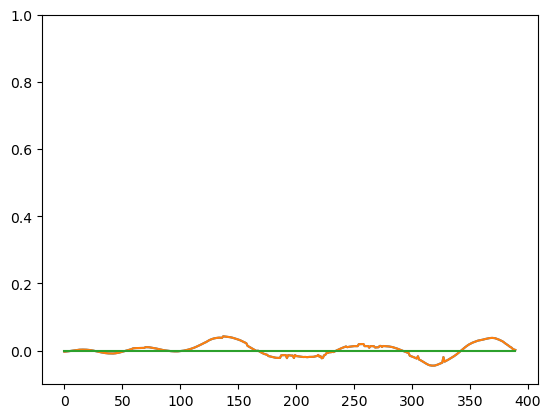

In [12]:
vv = bc1.variables['ubar_west'][:]
v2 = ic1.variables['ubar'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,:,0])
p3=ax.plot(vv[0,:]-v2[0,:,0])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 390)


(-0.1, 30.0)

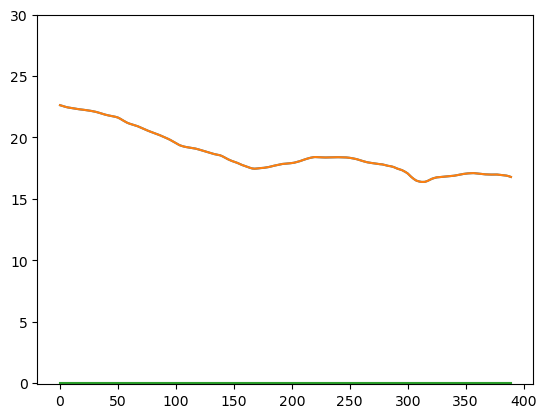

In [13]:
vv = bc1.variables['temp_west'][:]
v2 = ic1.variables['temp'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,:,0])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,:,0])
ax.set_ylim([-.1, 30])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 390)


(-0.1, 35.0)

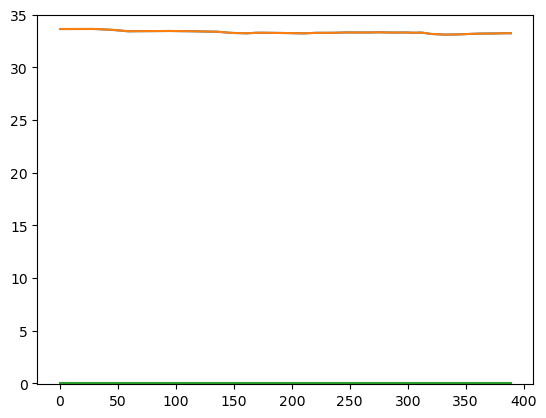

In [14]:
vv = bc1.variables['salt_west'][:]
v2 = ic1.variables['salt'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,:,0])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,:,0])
ax.set_ylim([-.1, 35])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 389)


(-1.0, 1.0)

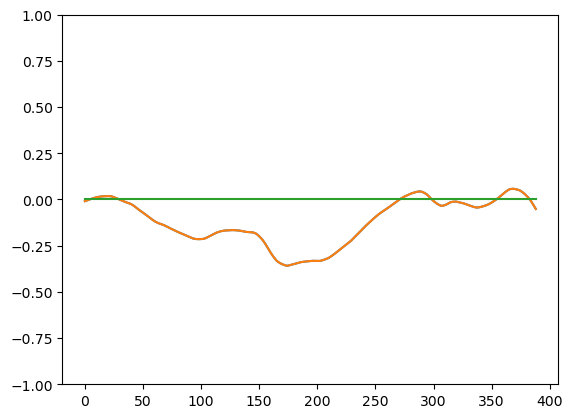

In [15]:
vv = bc1.variables['v_west'][:]
v2 = ic1.variables['v'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,:,0])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,:,0])
ax.set_ylim([-1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 390)


(-1.0, 1.0)

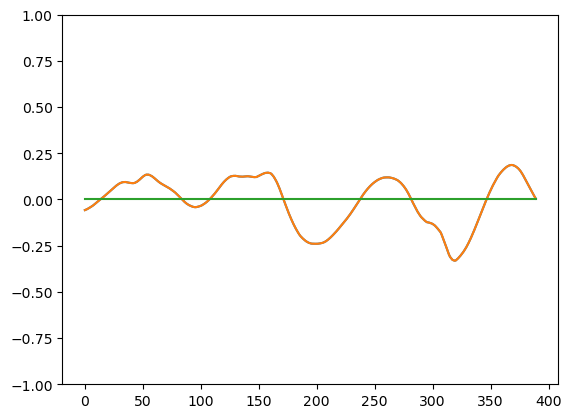

In [16]:
vv = bc1.variables['u_west'][:]
v2 = ic1.variables['u'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,:,0])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,:,0])
ax.set_ylim([-1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')



(21, 40, 390)


(-1.0, 1.0)

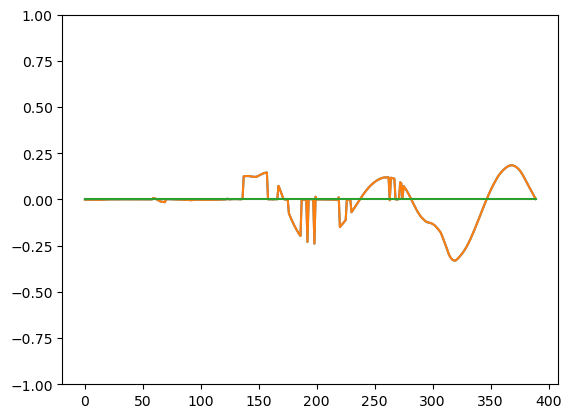

In [17]:
vv = bc1.variables['u_west'][:]
v2 = ic1.variables['u'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,0,:])
p1=ax.plot(v2[0,0,:,0])
p3=ax.plot(vv[0,0,:]-v2[0,0,:,0])
ax.set_ylim([-1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 252)


(120.0, 130.0)

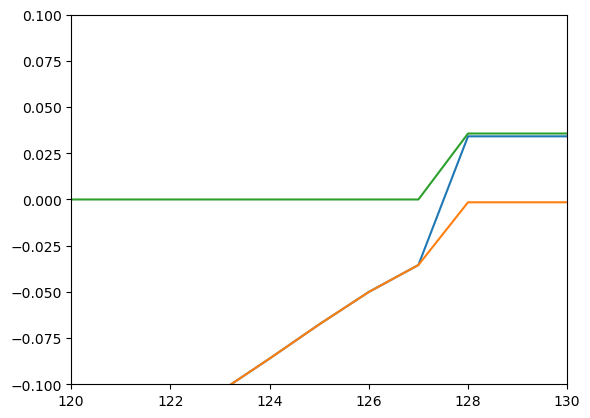

In [18]:
vv = bc1.variables['u_north'][:]
v2 = ic1.variables['u'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,-1,:])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,-1,:])
ax.set_ylim([-.1, .1])
ax.set_xlim([120,130])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 253)


(-1.0, 1.0)

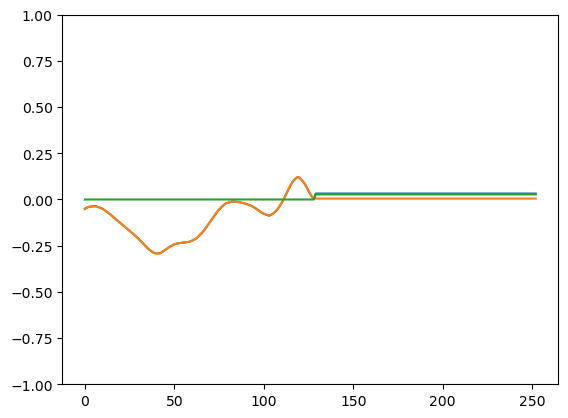

In [19]:
vv = bc1.variables['v_north'][:]
v2 = ic1.variables['v'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,-1,:])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,-1,:])
ax.set_ylim([-1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 253)


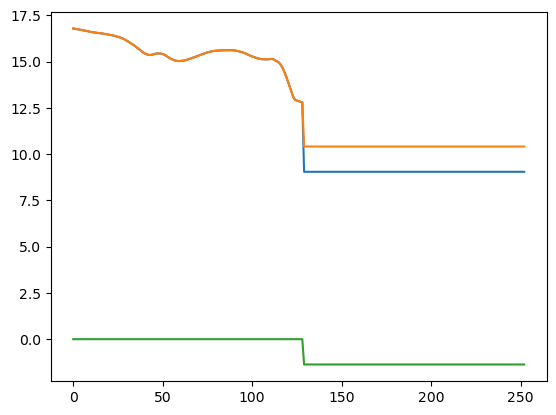

In [20]:
vv = bc1.variables['temp_north'][:]
v2 = ic1.variables['temp'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,-1,:])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,-1,:])
#ax.set_ylim([-1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 253)


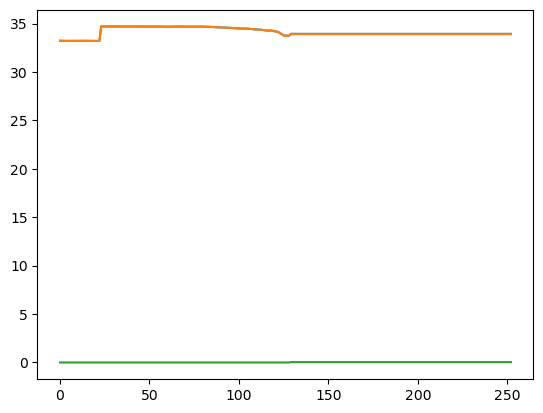

In [21]:
vv = bc1.variables['salt_north'][:]
v2 = ic1.variables['salt'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,0,:])
p1=ax.plot(v2[0,0,-1,:])
p3=ax.plot(vv[0,0,:]-v2[0,0,-1,:])
#ax.set_ylim([33, 34])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


In [ ]:
vv = bc1.variables['salt_north'][:]
v2 = ic1.variables['salt'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,-1,:])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,-1,:])
ax.set_ylim([33, 34])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')



In [ ]:

# this block of code shows that there are only NaNs on land
# for the boundary conditions file

vns = ['zeta','ubar','vbar','salt','temp','u','v']
grs = ['mask_rho','mask_u','mask_v','mask_rho','mask_rho','mask_u','mask_v']
eds = ['_north','_south','_west']
nzs = [1,1,1,40,40,40,40]
nt = 21
for aa in range(7):
    nz = nzs[aa]
    nn = nz*nt
    for bb in eds:
        mk = grd.variables[grs[aa]][:]
        vv = bc1.variables[vns[aa]+bb][:]
        #print(vns[aa] + bb)
        #print(np.shape(vv))
        if bb=='_north':
            mk=mk[-1,:]
        elif bb=='_south':
            mk=mk[0,:]
        elif bb=='_west':
            mk=mk[:,0]

        num_nan_0 = nn*np.sum( 1-mk )
        num_nan = np.count_nonzero( np.isnan( vv ))
        print('there should be ' + str(num_nan_0) + ' NaNs in ' + vns[aa]+bb)
        print('there are: ' + str(num_nan) +' NaNs\n')


In [25]:
# this block of code shows that there are only NaNs on land
# for the IC fields

vns = ['zeta','ubar','vbar','salt','temp','u','v']
grs = ['mask_rho','mask_u','mask_v','mask_rho','mask_rho','mask_u','mask_v']
nzs = [1,1,1,40,40,40,40]

cnt = 0
for aa in range(7):
    vv = ic1.variables[vns[aa]][:]
    mk = grd.variables[grs[aa]][:]
    nz = nzs[aa]
    if nz==40:
        vv2 = vv[0,:,:,:]
    else:
        vv2 = vv[0,:,:]
    num_nan_0 = nz*np.sum( 1-mk )
    num_nan = np.count_nonzero( np.isnan( vv2 ))
    print('there should be ' + str(num_nan_0) + ' NaNs in ' + vns[aa])
    print('there are: ' + str(num_nan) +' NaNs\n')


there should be 17453.0 NaNs in zeta
there are: 17453 NaNs

there should be 17538.0 NaNs in ubar
there are: 17538 NaNs

there should be 17593.0 NaNs in vbar
there are: 17593 NaNs

there should be 698120.0 NaNs in salt
there are: 698120 NaNs

there should be 698120.0 NaNs in temp
there are: 698120 NaNs

there should be 701520.0 NaNs in u
there are: 701520 NaNs

there should be 703720.0 NaNs in v
there are: 703720 NaNs



10.408486998054535
10.408486998054535
3946800
3946800
0.0


TypeError: Invalid shape (40, 390, 253) for image data

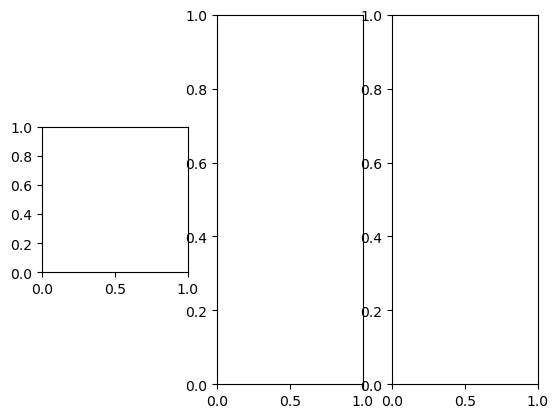

In [37]:


zeta = ic1.variables['temp'][:]
#print(grd.variables.keys())
mask_rho = grd.variables['mask_rho']



print(np.nanmean(zeta))
print(zeta.mean())

zeta2 = zeta.copy()
zeta2 = zeta2.filled(zeta2.mean())
inz = np.isnan(zeta)

print(np.count_nonzero(zeta))
print(np.count_nonzero(zeta2))

zg = np.ones(np.shape(zeta))
zg[inz] = 0

dn = zg[0,:,:] - mask_rho

print(np.sum(dn))

fig, ax = plt.subplots(nrows=1, ncols=3)
p0=ax[0].imshow(zg[0,:,:], interpolation='none',origin='lower')
p1=ax[1].imshow(mask_rho, interpolation='none',origin='lower')
p2=ax[2].imshow(dn, interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax[0],location='bottom')
fig.colorbar(p1, ax=ax[1],location='bottom')
fig.colorbar(p2, ax=ax[2],location='bottom')
p0.set_clim(0,1)
p1.set_clim(0,1)
p2.set_clim(-.01,.01)

fig, ax = plt.subplots(nrows=1, ncols=2)
p0=ax[0].imshow(zeta[0,:,:], interpolation='none',origin='lower')
p1=ax[1].imshow(zeta2[0,:,:], interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax[0],location='bottom')
fig.colorbar(p1, ax=ax[1],location='bottom')
#p0.set_clim(0,1)
#p1.set_clim(0,1)



In [ ]:


tic1 = ic1.variables['ocean_time']
tic2 = ic2.variables['ocean_time']

print(ic1.variables.keys())
print(ic2.variables.keys())

u1 = ic1.variables['u']
u2 = ic2.variables['u']
v1 = ic1.variables['v']
v2 = ic2.variables['v']
temp1 = ic1.variables['temp']
temp2 = ic2.variables['temp']
s1 = ic1.variables['salt']
s2 = ic2.variables['salt']
e1 = ic1.variables['zeta']
e2 = ic2.variables['zeta']

u10=u1[:]
u20=u2[:]
v10=v1[:]
v20=v2[:]
t10=temp1[:]
t20=temp2[:]
s10=s1[:]
s20=s2[:]
e10=e1[:]
e20=e2[:]

print(np.shape(u10))
print(np.shape(u20))

u1s = np.squeeze(u10[0,39,:,:])
u2s = np.squeeze(u20[0,0,39,:,:])
v1s = np.squeeze(v10[0,39,:,:])
v2s = np.squeeze(v20[0,0,39,:,:])
t1s = np.squeeze(t10[0,39,:,:])
t2s = np.squeeze(t20[0,0,39,:,:])
s1s = np.squeeze(s10[0,39,:,:])
s2s = np.squeeze(s20[0,0,39,:,:])
e1s = np.squeeze(e10[0,:,:])
e2s = np.squeeze(e20[0,0,:,:])

print(np.shape(e1s))
print(np.shape(e2s))

print(np.count_nonzero(np.isnan(u1s)))
print(np.count_nonzero(np.isnan(u2s)))
print(np.count_nonzero(np.isnan(v1s)))
print(np.count_nonzero(np.isnan(v2s)))
print(np.count_nonzero(np.isnan(t1s)))
print(np.count_nonzero(np.isnan(t2s)))
print(np.count_nonzero(np.isnan(s1s)))
print(np.count_nonzero(np.isnan(s2s)))
print(np.count_nonzero(np.isnan(e1s)))
print(np.count_nonzero(np.isnan(e2s)))


print(np.nanmean(u1s))
print(np.nanmean(u2s))
print(np.nanmean(v1s))
print(np.nanmean(v2s))

print(u1s[0,-2:])
print(u2s[0,-2:])

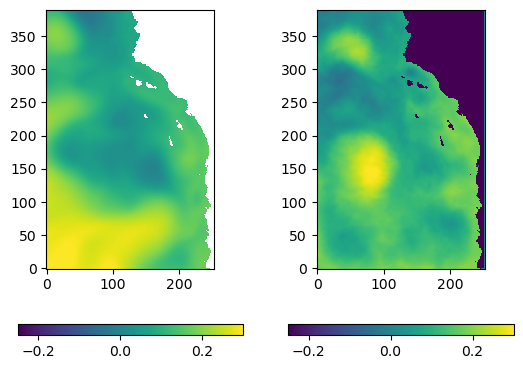

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2)

p0=ax[0].imshow(e1s, interpolation='none',origin='lower')
p1=ax[1].imshow(e2s, interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax[0],location='bottom')
fig.colorbar(p1, ax=ax[1],location='bottom')
p0.set_clim(-.25,.3)
p1.set_clim(-.25,.3)

In [63]:
a1 = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/LV1_ATM_FORCING.nc')
a2 = netCDF4.Dataset('/scratch/matt/sdtjre_L1/roms_nam_LV1_20181216_20190115.nc')
#print(a1.variables.keys())
#print(a2.variables.keys())
tf1 = a1.variables['ocean_time']
tf2 = a2.variables['ocean_time']

tt1 = netCDF4.num2date(tf1[:],tf1.units)
tt2 = netCDF4.num2date(tf2[:],tf2.units)
print(tt1)
print(tt2)



ValueError: Unable to parse date string 'tref'

: 